https://www.kaggle.com/mahirkukreja/delhi-weather-data


Wanted to add other features ( mean temp last day). not going to that.

Maybe look at:
https://docs.fast.ai/tabular.transform.html#add_cyclic_datepart

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/weather_deli_incl_date.csv')

In [4]:
df.head()

,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,...,datetime_utcYear,datetime_utcMonth,datetime_utcWeek,datetime_utcDay,datetime_utcDayofweek,datetime_utcDayofyear,datetime_utcHour,datetime_utcMinute,datetime_utcSecond,datetime_utcElapsed
0,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,...,1996,11,44,1,4,306,11,0,0,846846000
1,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,...,1996,11,44,1,4,306,12,0,0,846849600
2,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,...,1996,11,44,1,4,306,13,0,0,846853200
3,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,...,1996,11,44,1,4,306,14,0,0,846856800
4,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,...,1996,11,44,1,4,306,16,0,0,846864000


In [188]:
features = [s for s in df.columns if 'datetime_utc' in s] + ['tempm']
print(features)
n, m, timesteps = 10000, len(features), 24

['datetime_utcYear', 'datetime_utcMonth', 'datetime_utcWeek', 'datetime_utcDay', 'datetime_utcDayofweek', 'datetime_utcDayofyear', 'datetime_utcHour', 'datetime_utcMinute', 'datetime_utcSecond', 'datetime_utcElapsed', 'tempm']


In [195]:
df = df.loc[:,features].dropna()

In [196]:
df.head()

,datetime_utcYear,datetime_utcMonth,datetime_utcWeek,datetime_utcDay,datetime_utcDayofweek,datetime_utcDayofyear,datetime_utcHour,datetime_utcMinute,datetime_utcSecond,datetime_utcElapsed,tempm
0,1996,11,44,1,4,306,11,0,0,846846000,30.0
1,1996,11,44,1,4,306,12,0,0,846849600,28.0
2,1996,11,44,1,4,306,13,0,0,846853200,24.0
3,1996,11,44,1,4,306,14,0,0,846856800,24.0
4,1996,11,44,1,4,306,16,0,0,846864000,23.0


In [197]:
from fastai import *
from fastai.tabular import *

In [198]:
valid_idx = range(len(df)-2000, len(df))
print(valid_idx,df.shape)
cat_names = []
dep_var = 'tempm'

range(98317, 100317) (100317, 11)


In [199]:
procs = [FillMissing, Categorify, Normalize]
data = TabularDataBunch.from_df('data', df, dep_var, valid_idx=valid_idx, procs=procs)

In [203]:
learn = tabular_learner(data,[16,16],metrics=mean_absolute_error, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


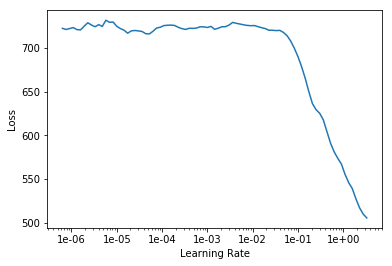

In [204]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,time
0,13.614720,9.502119,2.447743,00:09


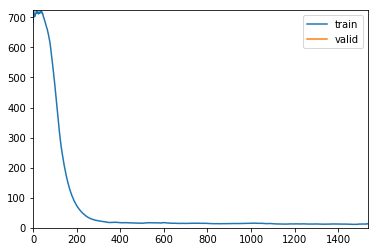

In [205]:
learn.fit_one_cycle(1,1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


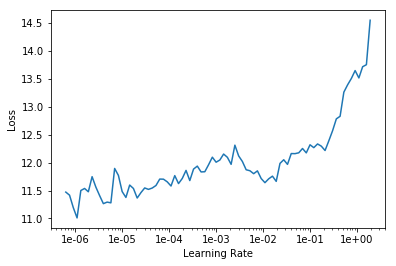

In [208]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,time
0,11.329096,8.693574,2.355293,00:09


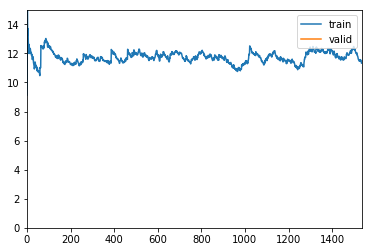

In [209]:
learn.fit_one_cycle(1,1e-3)